# THE MINI FINITE STATE MACHINE: MANUALLY AND BASIC #

**The purpose of this code is to create a mini state machine, where, it will read the hanoi game, and based in a fixed matrix disc position, determine if the movements go well or bad.**

_**Main mission: only to test the modules developed**_

**The future work: yolo, ros2, etc..... check the cheklist for the remaining work, that, should be integrated to the great final machine.**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#my custom modules imports
import settings as glb #this import all the global variables
import hanoi_img_proc as vidpro
import matrix_proc as mtrx


In [3]:
#function that display a unique image
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (8,9))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
def compare_the_matrix_num(detected_mtrx, state):

    hanoi_mat= glb.hanoi_matrix_num[(3*state):(3*(state+1)), :]
    compare = (detected_mtrx == hanoi_mat).all()
    return compare



In [5]:
state = 0

In [5]:
#just once, for now should be automatized
pt1 = (216, 328) 
pt2 = (363, 391)
total_width = pt2[0] - pt1[0]
total_height = pt2[1] - pt1[1]

#from previuos test, with 15 width pixels for the detection zone is good
mask_x = int(total_width*(0.15))  # the initial point of the stick position, then, is added the sticks offset (x,y) coordinates
mask_y = int(total_height *(0.25))  #inital point 
glb.mask_width = 15  #width by pixels, for now it is stated as a fixed value... for now....
glb.mask_height = int(total_height *(0.73))  #height by pixels

stick_position_dict = {'stick0' : 0, 'stick1': int(total_width*(0.25)), 'stick2' : int(total_width*(0.6))}
sort_disc_dictionary = {'sort0' : None, 'sort1': None, 'sort2': None}

In [32]:
#done every state: Take the big frame
frame = vidpro.take_one_frame()
newframe = frame.copy()

Frame taken


In [33]:
imageRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

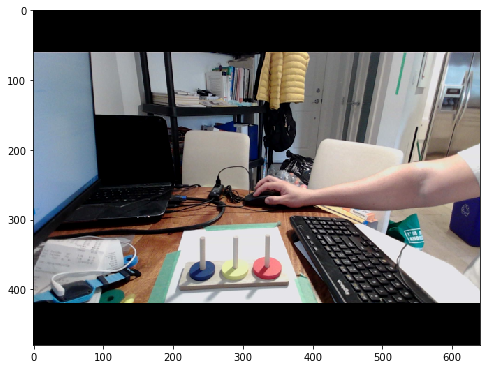

In [34]:
display(imageRGB)

In [35]:
#done every state: Get the small frame or ROI
hanoi_roi= newframe[pt1[1]:pt2[1], pt1[0]:pt2[0]]
imagehsv = cv2.cvtColor(hanoi_roi, cv2.COLOR_BGR2HSV)

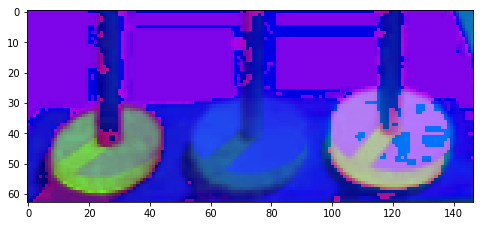

In [36]:
display(imagehsv)

In [20]:
glb.mask_height
#mask_height = glb.mask_height

45

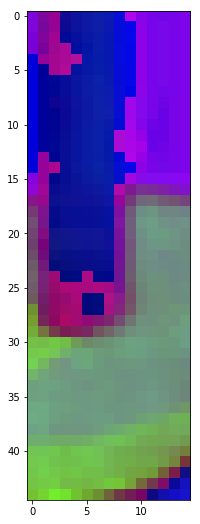

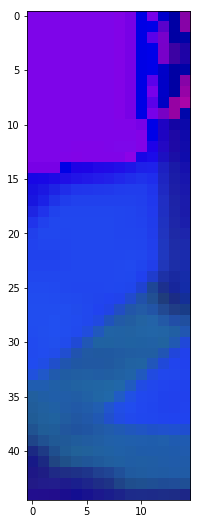

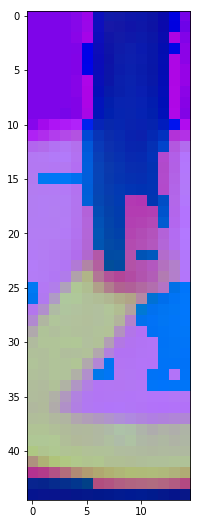

In [37]:
#this should be done every state in the FSM: get the 3 subregions, each one for stick
for i in range(0, 3):
    imagehsv_roi = imagehsv[mask_y:mask_y + glb.mask_height, int(mask_x + stick_position_dict['stick'+str(i)]):(mask_x + stick_position_dict['stick'+str(i)]+glb.mask_width)]
    display(imagehsv_roi)
    sort_disc_dictionary['sort' + str(i)] = vidpro.detect_color(imagehsv_roi)   #this is the custom function

In [41]:
#only for debugging 
for i in range (0 , 3):
    print(sort_disc_dictionary['sort' + str(i)])   

[['Y', 0], ['B', 0], ['R', 0]]
[['B', 12], ['Y', 35], ['R', 42]]
[['Y', 0], ['B', 0], ['R', 0]]


In [38]:
#should be done every state
detected_matrix_num = mtrx.get_detected_matrix_num(sort_disc_dictionary)

In [39]:
detected_matrix_num

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 3.]])

In [17]:
hanoi_mat= glb.hanoi_matrix_num[(3*state):(3*(state+1)), :]

In [18]:
hanoi_mat

array([[1, 0, 0],
       [2, 0, 0],
       [3, 0, 0]])

In [19]:
(detected_matrix_num == hanoi_mat).all()

True

In [87]:
#shoudl be done every state
compare_the_matrix_num(detected_matrix_num, state)

False